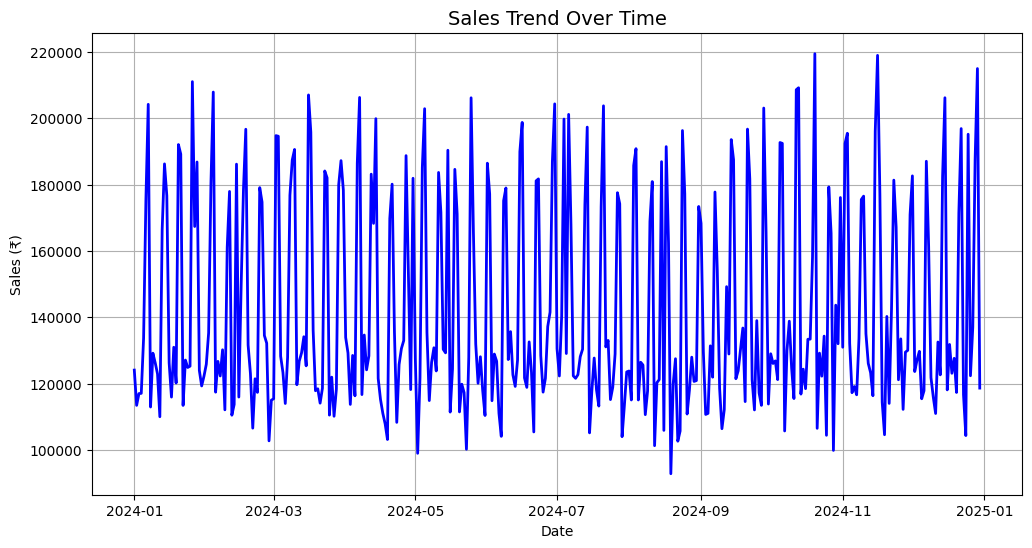

/tmp/ipython-input-3074337612.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales_data, x='year', y='sales', palette='Set2')


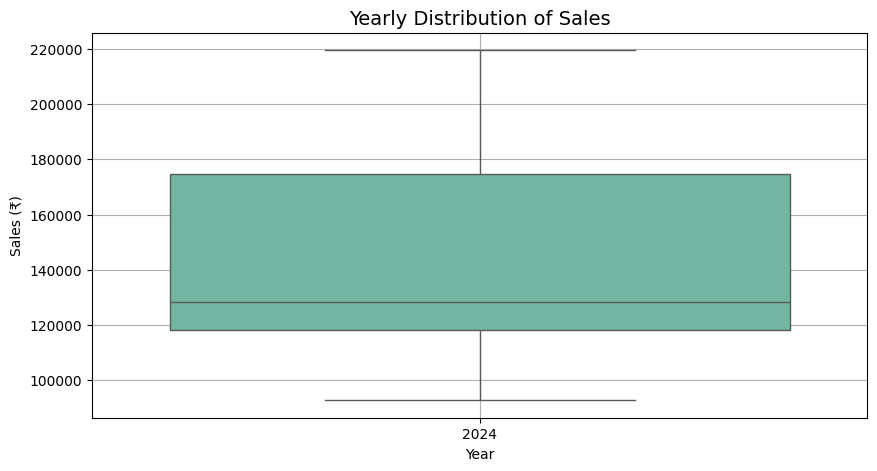

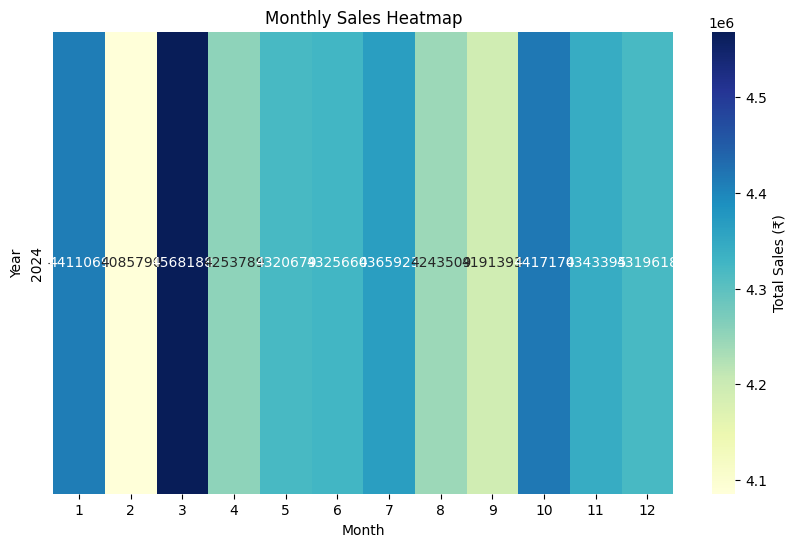

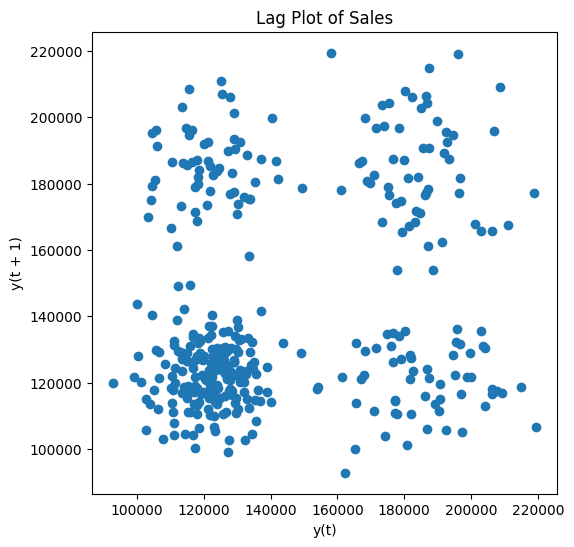

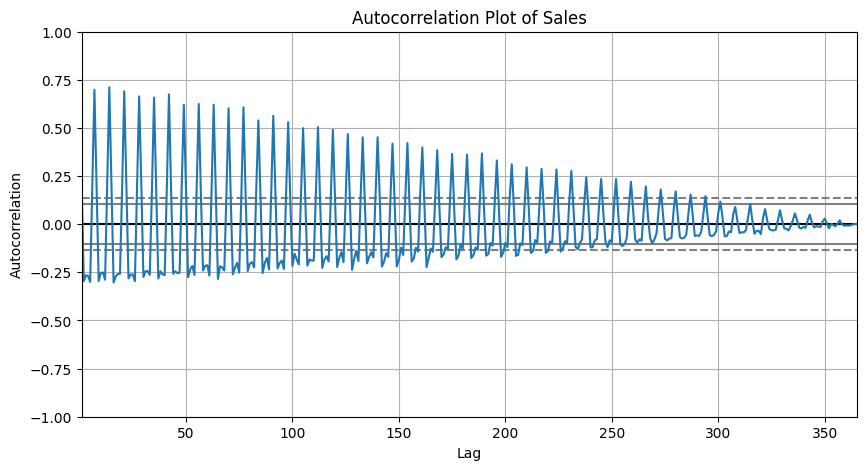

In [4]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot

# ================================
# 1️⃣ LOAD AND CLEAN THE DATA
# ================================
file_path = '/content/ncr_ride_bookings.csv'
data = pd.read_csv(file_path)

# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])

# Convert Booking Value to numeric (treat as Sales)
data['Booking Value'] = pd.to_numeric(data['Booking Value'], errors='coerce')
data = data.dropna(subset=['Booking Value'])

# Aggregate daily sales
sales_data = data.groupby('Date', as_index=False)['Booking Value'].sum()
sales_data.rename(columns={'Booking Value': 'sales'}, inplace=True)

# Extract year, month, and day for analysis
sales_data['year'] = sales_data['Date'].dt.year
sales_data['month'] = sales_data['Date'].dt.month
sales_data['day'] = sales_data['Date'].dt.day

# ================================
# 2️⃣ LINE PLOT (Trend over Time)
# ================================
plt.figure(figsize=(12, 6))
plt.plot(sales_data['Date'], sales_data['sales'], color='blue', linewidth=2)
plt.title('Sales Trend Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sales (₹)')
plt.grid(True)
plt.show()

# Observation:
# You can visually identify seasonal trends, growth, or dips.

# ================================
# 3️⃣ BOX PLOT (Yearly Comparison)
# ================================
plt.figure(figsize=(10, 5))
sns.boxplot(data=sales_data, x='year', y='sales', palette='Set2')
plt.title('Yearly Distribution of Sales', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Sales (₹)')
plt.grid(True)
plt.show()

# ================================
# 4️⃣ HEATMAP (Year vs Month)
# ================================
# Calculate total monthly sales
monthly_sales = sales_data.groupby(['year', 'month'])['sales'].sum().reset_index()

# Pivot for heatmap
sales_pivot = monthly_sales.pivot(index='year', columns='month', values='sales')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot, cmap='YlGnBu', cbar_kws={'label': 'Total Sales (₹)'}, annot=True, fmt='.0f')
plt.title('Monthly Sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# ================================
# 5️⃣ LAG PLOT (Sales Correlation)
# ================================
plt.figure(figsize=(6, 6))
lag_plot(sales_data['sales'])
plt.title('Lag Plot of Sales')
plt.show()

# Interpretation:
# If points move from bottom-left to top-right → positive correlation (sales follow a pattern).

# ================================
# 6️⃣ AUTOCORRELATION PLOT
# ================================
plt.figure(figsize=(10, 5))
autocorrelation_plot(sales_data['sales'])
plt.title('Autocorrelation Plot of Sales')
plt.show()

# Interpretation:
# Oscillating waves indicate seasonality in sales data.
# Decaying correlation implies past sales influence near-future sales.

In [5]:
data.describe()

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,102000,102000.000000,102000.000000,0.0,0.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,2024-06-30 17:23:45.600000,8.291455,29.149636,NaN,NaN,1.0,508.295912,24.637012,4.230992,4.404584
min,2024-01-01 00:00:00,2.000000,10.000000,NaN,NaN,1.0,50.000000,1.000000,3.000000,3.000000
25%,2024-04-01 00:00:00,5.100000,21.600000,NaN,NaN,1.0,234.000000,12.460000,4.100000,4.200000
50%,2024-06-30 00:00:00,8.200000,28.800000,NaN,NaN,1.0,414.000000,23.720000,4.300000,4.500000
75%,2024-09-30 00:00:00,11.400000,36.800000,NaN,NaN,1.0,689.000000,36.820000,4.600000,4.800000
max,2024-12-30 00:00:00,15.000000,45.000000,NaN,NaN,1.0,4277.000000,50.000000,5.000000,5.000000
std,NaN,3.712160,8.902577,NaN,NaN,0.0,395.805774,14.002138,0.436871,0.437819
